# Projet: Prédire les Prix Immobiliers
Présenté par:
- BENRACHID Souhaila
- MANSOUR Sabine
- SOUIDARAY Zakaria

## 1. Introduction

Dans ce projet, nous explorons le marché immobilier californien afin de découvrir les tendances qui influencent les prix des logements. En utilisant le **California Housing Dataset**, un ensemble de données détaillé contenant des informations géographiques, démographiques et économiques, nous allons développer un modèle de régression linéaire capable de prédire la valeur médiane des maisons dans différents districts de Californie.

Grâce à des outils statistiques avancés, notre objectif est d'identifier les variables déterminantes qui expliquent les fluctuations des prix immobiliers et d'analyser comment elles interagissent pour influencer ces prix.

## 2.Importation des Bibliothèques

In [478]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import RidgeCV, LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh
import matplotlib.pyplot as plt

## 3. Importation des Données

Nous allons importer le California Housing Dataset depuis la bibliothèque sklearn. 

In [481]:
from sklearn.datasets import fetch_california_housing
california_data = fetch_california_housing(as_frame=True)
data = california_data.frame
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 4. Explication des Données

Le California Housing Dataset contient les variables suivantes :

**MedInc** : Revenu médian des ménages dans un bloc (en dizaines de milliers de dollars).    
➔ *Exemple* : une valeur de 3.5 indique un revenu médian de 35 000 $.

**HouseAge** : Âge médian des logements dans un bloc (en années).  
➔ *Exemple* : une valeur de 20 signifie que la moitié des logements ont moins de 20 ans.

**AveRooms** : Nombre moyen de pièces par ménage.  
(les valeurs peuvent être élevées dans des blocs avec peu de ménages et beaucoup de logements vides).

**AveBedrms** : Nombre moyen de chambres par ménage.  
➔ Comme pour AveRooms, cette variable peut présenter des valeurs inhabituelles.

**Population** : Population totale dans le bloc.  
➔ *Exemple* : une valeur de 1000 représente une population totale de 1 000 personnes.

**AveOccup** : Nombre moyen de personnes par ménage.  
➔ *Exemple* : une valeur de 3 indique qu’en moyenne, chaque ménage comprend 3 personnes.

**Latitude** : Latitude géographique du bloc (en degrés).  
➔ Permet de situer le bloc sur une carte.

**Longitude** : Longitude géographique du bloc (en degrés).  
➔ À combiner avec la latitude pour localiser un bloc précisément.

**MedHouseVal** : Variable cible, valeur médiane des logements dans un bloc, exprimée en centaines de milliers de dollars.  
➔ *Exemple* : une valeur de 2 indique un prix médian de 200 000 $.



## 5. Division des Données : Entraînement et Test

Nous divisons le jeu de données en deux parties :
1. un ensemble d'entraînement (80 %) pour construire et ajuster notre modèle
2. un ensemble de test (20 %) pour évaluer ses performances.
   
Cette séparation garantit une évaluation réaliste de la capacité du modèle à généraliser sur de nouvelles données.

Mais avant cela, il est important de séparer les variables explicatives (X) de la variable cible (y). Cette séparation permet de distinguer les informations que le modèle utilisera pour faire des prédictions (X) de ce que nous cherchons à prédire (y), facilitant ainsi les étapes suivantes du prétraitement et de la modélisation.

In [487]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='MedHouseVal')
y = data['MedHouseVal']               

In [488]:
# division des données en entraînement (80 %) et test (20 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Vérifions que les ensembles d'entraînement et de test ont été divisés correctement et que les dimensions des variables explicatives (X) correspondent à celles de la variable cible (y).

In [490]:
print("Taille des données d'entraînement :", X_train.shape, y_train.shape)
print("Taille des données de test :", X_test.shape, y_test.shape)

Taille des données d'entraînement : (16512, 8) (16512,)
Taille des données de test : (4128, 8) (4128,)


La division est correcte : 16 512 données d'entraînement et 4 128 de test, assurant une répartition de 80 % - 20 % comme prévu.

## 6. Analyse et Préparation des Données d’Entraînement
Dans cette étape, nous allons appliquer les transformations nécessaires sur les données d'entraînement, telles que le nettoyage, la création de nouvelles variables, et la gestion des valeurs aberrantes. Nous veillerons à ce que ces transformations soient également appliquées aux données de test afin d'assurer une cohérence entre les deux ensembles de données.

### 6.1 Gestion des Valeurs Manquantes

Les valeurs manquantes peuvent perturber les performances des modèles prédictifs. Dans cette étape, nous identifions et traitons les valeurs manquantes dans l'ensemble d'entraînement, puis appliquons les mêmes transformations à l'ensemble de test.

In [495]:
print("Valeurs manquantes dans X_train :\n", X_train.isnull().sum())
print("Valeurs manquantes dans X_test :\n", X_test.isnull().sum())

Valeurs manquantes dans X_train :
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64
Valeurs manquantes dans X_test :
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


Aucune valeur manquante n’a été détectée dans les données d’entraînement et de test. Par conséquent, aucune transformation n’est nécessaire pour cette étape.

### 6.2 Identification des Données Redondantes

Nous vérifions si notre ensemble d'entraînement contient des doublons. Les données redondantes, si elles existent, doivent être supprimées pour éviter qu’elles ne biaisent notre analyse et notre modélisation

In [499]:
print(X_train.duplicated(subset=None, keep='first').any())
print(X_test.duplicated(subset=None, keep='first').any())

False
False


Aucun doublon détecté dans les données d'entraînement et de test. Cela confirme que chaque enregistrement est unique, et nous pouvons poursuivre l'analyse sans modifications supplémentaires.

### 6.3 Détection et Gestion des Valeurs Aberrantes

Les valeurs aberrantes peuvent influencer de manière disproportionnée les performances d'un modèle de régression linéaire, en faussant les coefficients estimés ou en augmentant l'erreur de prédiction. Dans cette étape, nous identifions les variables les plus pertinentes pour analyser les valeurs aberrantes, visualisons les données avec des graphes appropriés, et décidons du traitement à appliquer : conserver les valeurs extrêmes si elles sont pertinentes, les exclure si elles sont invalides, les transformer pour réduire leur impact, ou utiliser la méthode de Winsorization, qui consiste à tronquer les valeurs extrêmes à des seuils raisonnables tout en préservant la structure globale des données. 

#### 6.3.1 Analyse des Statistiques Descriptives

Pour commencer notre analyse des valeurs aberrantes, nous examinons les statistiques descriptives des variables. Cette étape permet d’identifier rapidement les valeurs extrêmes potentielles, telles que les minimums et maximums atypiques, qui pourraient indiquer des incohérences ou des cas particuliers nécessitant une investigation plus approfondie.

In [505]:
X_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.880754,28.608285,5.435235,1.096685,1426.453004,3.096961,35.643149,-119.582290
std,1.904294,12.602499,2.387375,0.433215,1137.056380,11.578744,2.136665,2.005654
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000
25%,2.566700,18.000000,4.452055,1.006508,789.000000,2.428799,33.930000,-121.810000
50%,3.545800,29.000000,5.235874,1.049286,1167.000000,2.817240,34.260000,-118.510000
75%,4.773175,37.000000,6.061037,1.100348,1726.000000,3.280000,37.720000,-118.010000
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000


Les statistiques descriptives révèlent plusieurs valeurs extrêmes potentielles :

- **MedInc** : Maximum élevé (15.0001) comparé à la moyenne (3.88), potentiellement des zones très riches.
- **AveRooms** : Maximum exceptionnellement élevé (141.91) par rapport au 75e percentile (6.06), suggérant des cas inhabituels ou des anomalies.
- **AveBedrms** : Maximum (25.63) très supérieur à la moyenne (1.10), nécessitant une vérification pour en assurer la cohérence.
- **Population** : Valeur maximale (35,682) très au-delà du 75e percentile (1,726), probablement des agglomérations ou anomalies.
- **AveOccup** : Maximum (1243.33) très éloigné de la moyenne (3.10), nécessitant une vérification approfondie.

  
Ces observations mettent en évidence des valeurs potentiellement aberrantes qui justifient une exploration plus approfondie, notamment par des visualisations (histogrammes, boxplots) et l’application de critères rigoureux pour décider du traitement approprié.

#### 6.3.2 Visualisation : Identification des Valeurs Aberrantes à l'Aide des Distributions et des Boxplots

On complète l’analyse par une visualisation des variables à l’aide de boxplots et d’histogrammes.

* Les boxplots permettent d’identifier visuellement les valeurs aberrantes. Les points situés en dehors des "moustaches" représentent des observations atypiques qui pourraient influencer les analyses ou les modèles.
  
* En complément, les histogrammes offrent une vue sur la distribution des variables, permettant de détecter des asymétries ou des queues longues. Ces caractéristiques peuvent révéler des valeurs extrêmes naturelles ou des anomalies.

   
Ces deux outils combinés nous ont permis d'approfondir l’identification des valeurs extrêmes, en confirmant certaines observations faites avec les statistiques descriptives.



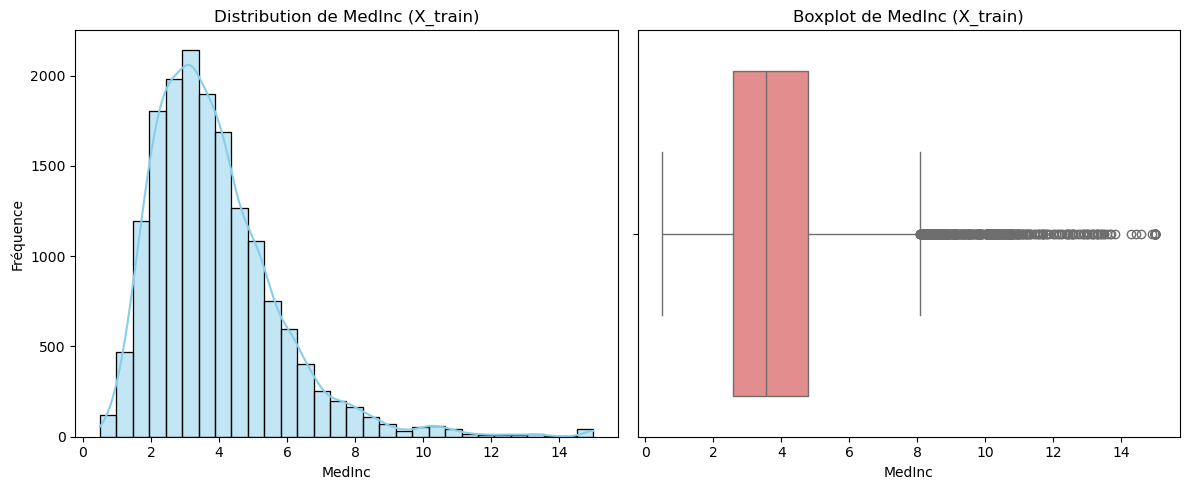

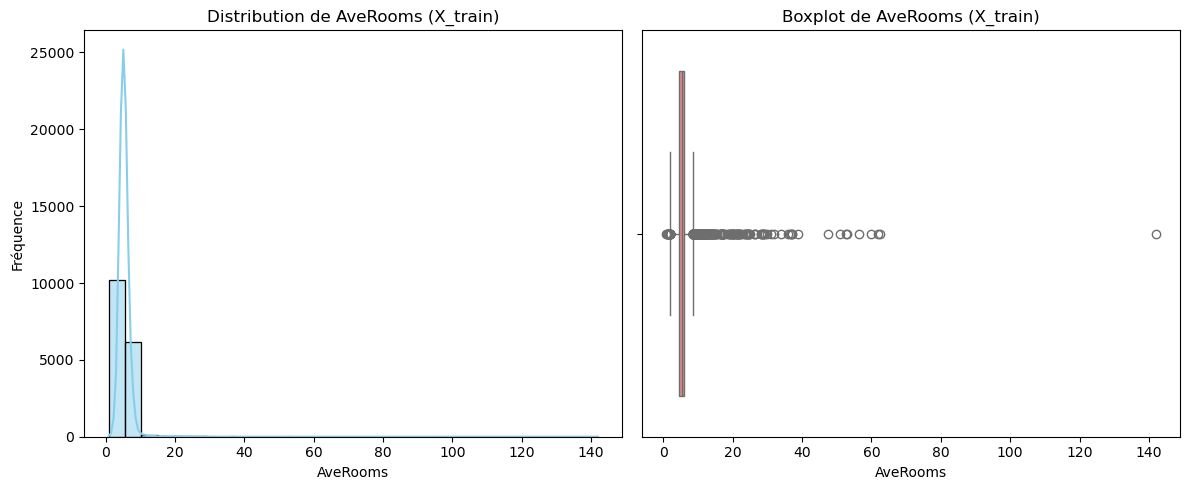

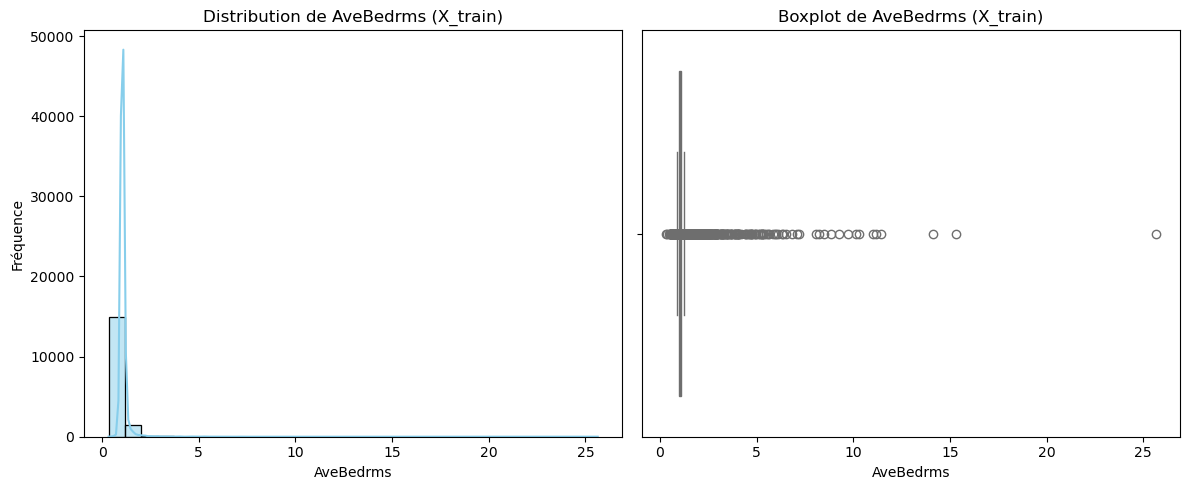

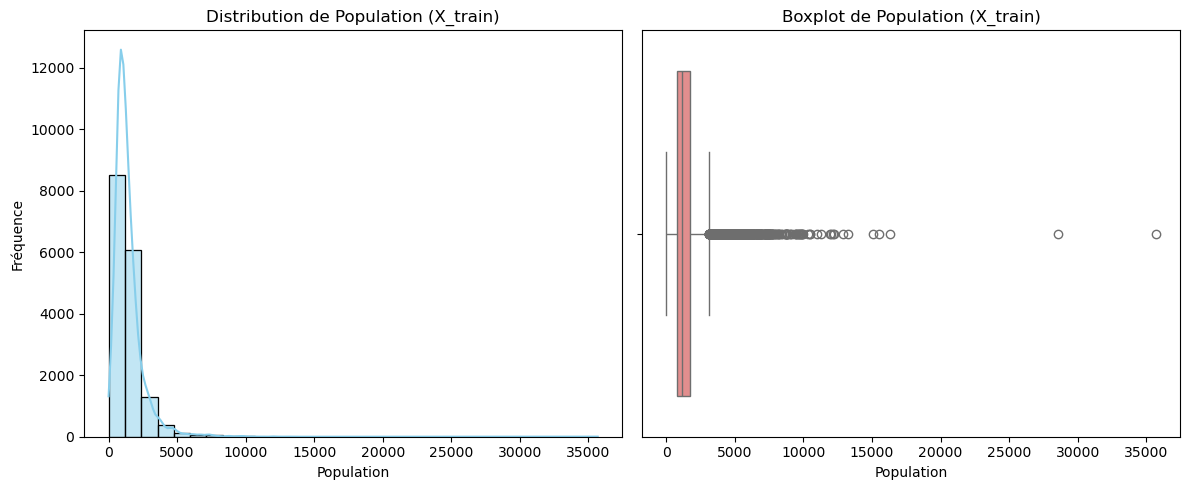

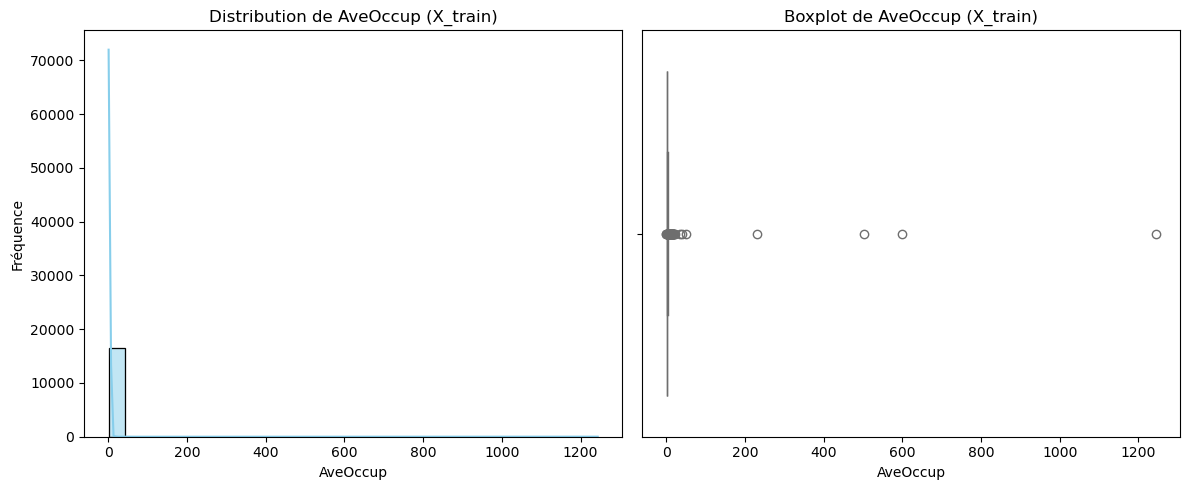

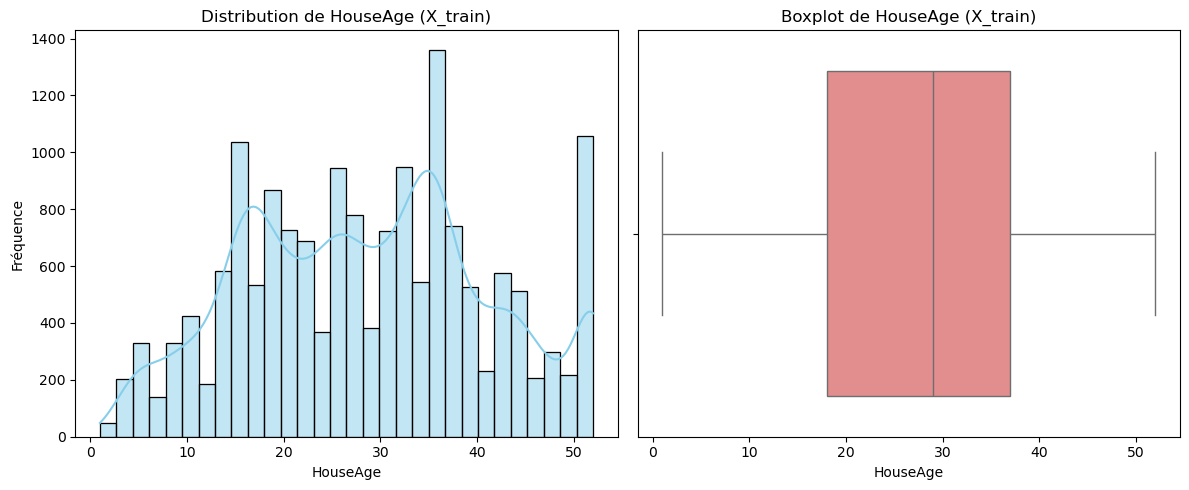

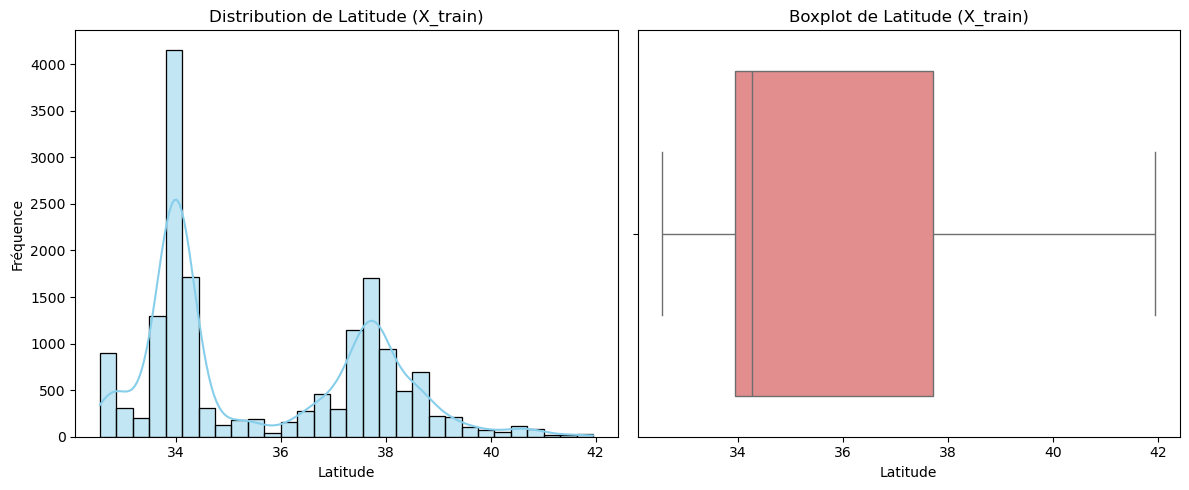

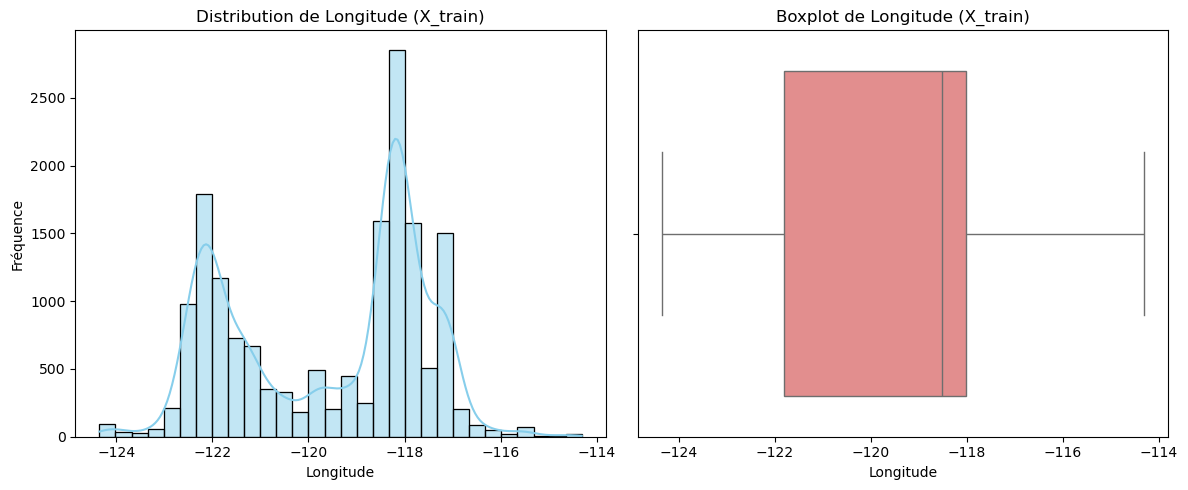

In [509]:
columns = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'HouseAge', 'Latitude', 'Longitude' ]

for col in columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Histogramme 
    sns.histplot(X_train[col], bins=30, kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f'Distribution de {col} (X_train)')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Fréquence')
    
    # Boxplot 
    sns.boxplot(x=X_train[col], ax=axes[1], color="lightcoral")
    axes[1].set_title(f'Boxplot de {col} (X_train)')
    axes[1].set_xlabel(col)
    
    plt.tight_layout()
    plt.show()

En analysant les graphiques, plusieurs observations ressortent : 
- **MedInc** montre une queue droite modérée avec des valeurs élevées probablement liées à des zones riches.  
- **AveRooms** et **AveBedrms** présentent de longues queues droites avec des valeurs extrêmes confirmées par les boxplots, nécessitant une vérification.
- **Population** affiche une forte asymétrie avec des valeurs très élevées (> 10,000), correspondant potentiellement à des zones densément peuplées.
- **AveOccup** révèle des valeurs incohérentes (> 1,000) qui semblent aberrantes.
- En revanche, **HouseAge**, **Latitude**, et **Longitude** présentent des distributions attendues, sans anomalies significatives.

#### 6.3.3 Détection Rigoureuse

Après l’analyse graphique des données, nous passons à une détection plus rigoureuse des valeurs aberrantes. 

Cette étape utilise des mesures statistiques précises, notamment les **quartiles** et l’**écart interquartile (IQR)**, pour identifier les observations qui s’éloignent significativement de la majorité des données.   

Une valeur est considérée comme aberrante si elle est inférieure à $Q1 - 1.5 \cdot IQR$ ou supérieure à $Q3 + 1.5 \cdot IQR$, où $IQR = Q3 - Q1$.  

Cette méthode nous permet de quantifier les seuils des valeurs extrêmes, afin d’appuyer nos décisions sur leur gestion de manière objective et cohérente.

Elle sera appliquée uniquement aux variables présentant des valeurs aberrantes potentielles identifiées lors des analyses descriptives et graphiques `MedInc`, `AveRooms`, `AveBedrms`, `Population`, et `AveOccup`, tandis qu’elle sera omise pour les variables sans anomalies visibles, comme `HouseAge`, `Latitude`, et `Longitude`.

In [514]:
outliers = {}
variables = ['MedInc', 'AveRooms', 'AveOccup', 'AveBedrms', 'Population']

for var in variables:
    Q1 = X_train[var].quantile(0.25)  
    Q3 = X_train[var].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  
    
    
    outliers[var] = X_train[(X_train[var] < lower_bound) | (X_train[var] > upper_bound)]
    print(f"Variable: {var}")
    print(f"Limite inférieure: {lower_bound}, Limite supérieure: {upper_bound}")
    print(f"Nombre de valeurs aberrantes : {len(outliers[var])}\n")


Variable: MedInc
Limite inférieure: -0.7430125000000003, Limite supérieure: 8.0828875
Nombre de valeurs aberrantes : 529

Variable: AveRooms
Limite inférieure: 2.0385818023548805, Limite supérieure: 8.474509781463325
Nombre de valeurs aberrantes : 410

Variable: AveOccup
Limite inférieure: 1.1519972702456773, Limite supérieure: 4.556801637852593
Nombre de valeurs aberrantes : 582

Variable: AveBedrms
Limite inférieure: 0.8657476648673011, Limite supérieure: 1.2411074710635366
Nombre de valeurs aberrantes : 1153

Variable: Population
Limite inférieure: -616.5, Limite supérieure: 3131.5
Nombre de valeurs aberrantes : 955



Les résultats montrent des valeurs aberrantes identifiées dans toutes les variables analysées  Ces valeurs extrêmes dépassent les limites calculées avec l'écart interquartile et nécessitent un traitement pour limiter leur influence disproportionnée sur le modèle.

#### 6.3.4 Gestion des Valeurs Aberrantes


Dans cette étape, nous déterminons le traitement approprié pour chaque variable en fonction des valeurs aberrantes identifiées :  
- **Conservation** : Si les valeurs extrêmes sont pertinentes et informatives.  
- **Transformation** : Utiliser une transformation logarithmique pour réduire l’impact des longues queues.  
- **Winsorisation** : Tronquer les valeurs extrêmes à des seuils raisonnables tout en préservant la structure globale des données.  
- **Exclusion** : Supprimer les valeurs incohérentes ou manifestement erronées.  

L’objectif est d’améliorer la qualité des données sans compromettre leur intégrité.

##### 1) Pour `MedInc`
Les valeurs > 8.083 représentent des zones riches. Ces valeurs sont réalistes et informatives pour l’analyse. Il n’est donc pas nécessaire de les transformer ou de les exclure

##### 2) Pour `AveRooms` et `AveBedrms`
* AveRooms : Les valeurs > 8.475 sont suspectes (notamment celles dépassant 20). Ces cas rares peuvent biaiser l’analyse, donc une winsorisation est appropriée.
  
* AveBedrms : Les valeurs > 1.241 sont également rares et nécessitent une gestion pour limiter leur impact sans les supprimer. La winsorisation est également adaptée.

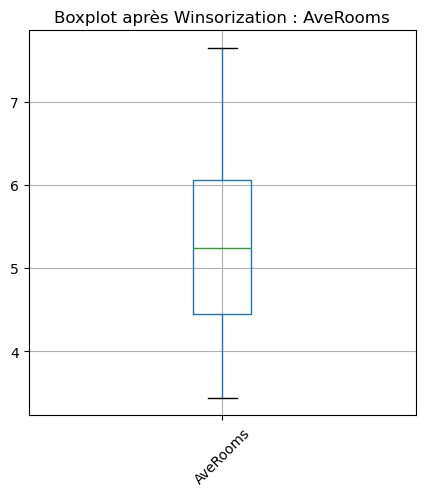

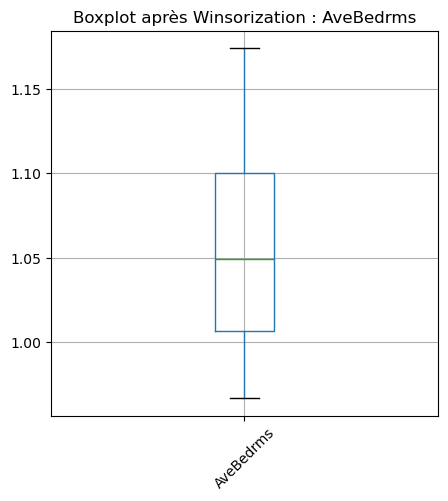

In [520]:
from scipy.stats.mstats import winsorize 

# Copier les données originales pour comparer avant/après Winsorisation
X_train_original = X_train.copy()

X_train['AveRooms'] = winsorize(X_train['AveRooms'], limits=[0.05, 0.05]).data
X_train['AveBedrms'] = winsorize(X_train['AveBedrms'], limits=[0.10, 0.10]).data

plt.figure(figsize=(5, 5))
X_train.boxplot(column=['AveRooms'])
plt.title("Boxplot après Winsorization : AveRooms")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(5, 5))
X_train.boxplot(column=['AveBedrms'])
plt.title("Boxplot après Winsorization : AveBedrms")
plt.xticks(rotation=45)
plt.show()

La Winsorisation a permis de réduire efficacement les valeurs extrêmes pour AveRooms et AveBedrms, ramenant leurs distributions à des limites raisonnables visibles dans les boxplots.

Comparons les limites minimales et maximales des variables avant et après la Winsorisation, afin de vérifier l’efficacité du traitement appliqué aux valeurs extrêmes.

In [523]:
for var in ['AveRooms', 'AveBedrms']:
    print(f"Variable: {var}")
    # Avant Winsorisation
    print(f"Avant Winsorization - Minimum: {X_train_original[var].min()}, Maximum: {X_train_original[var].max()}")
    
    # Après Winsorisation
    print(f"Après Winsorization - Minimum: {X_train[var].min()}, Maximum: {X_train[var].max()}")
    print("-" * 30)


Variable: AveRooms
Avant Winsorization - Minimum: 0.8888888888888888, Maximum: 141.9090909090909
Après Winsorization - Minimum: 3.437847866419295, Maximum: 7.646251319957761
------------------------------
Variable: AveBedrms
Avant Winsorization - Minimum: 0.3333333333333333, Maximum: 25.636363636363637
Après Winsorization - Minimum: 0.9667250437828371, Maximum: 1.1738382099827882
------------------------------


Après Winsorisation, les valeurs extrêmes de `AveRooms` et `AveBedrms` ont été efficacement réduites à des limites raisonnables, avec des maximums respectivement ramenés à 7.65 et 1.17, tout en conservant une plage de données cohérente et informative.

**Application de la Winsorisation sur `X_test`**

In [526]:
X_test['AveRooms'] = winsorize(X_test['AveRooms'], limits=[0.05, 0.05]).data
X_test['AveBedrms'] = winsorize(X_test['AveBedrms'], limits=[0.10, 0.10]).data

##### 3) Pour `AveOccup`
Les valeurs > 4.557 (notamment > 100) pourraient correspondre à des stations de vacances ou des complexes touristiques, mais ce n’est pas un cas général. Par conséquent, nous excluons ces valeurs aberrantes, car elles ne sont pas représentatives de la majorité des ménages.

Le problème ici est que l'exclusion des valeurs aberrantes dans `AveOccup` peut entraîner une désynchronisation entre `X_train` et `y_train`, ce qui pourrait causer des incohérences dans l'entraînement du modèle. De plus, cette désynchronisation peut également affecter `X_test` et `y_test`, ce qui entraînerait des erreurs lors de l'évaluation du modèle. Pour résoudre ce problème, nous allons nous assurer que lorsque nous excluons des lignes dans `X_train`, nous appliquons également le même filtrage à `y_train`, et nous vérifierons également que `X_test` et `y_test` sont synchronisés de manière à maintenir la correspondance des indices entre les caractéristiques et la cible.

In [529]:
X_train, y_train = X_train.align(y_train, axis=0)

X_train_original = X_train.copy()
y_train_original = y_train.copy()

indices_to_keep = X_train['AveOccup'] <= 4.557
X_train = X_train[indices_to_keep]

y_train = y_train[indices_to_keep]

print(f"Nombre de lignes dans X_train : {X_train.shape[0]}")
print(f"Nombre de lignes dans y_train : {y_train.shape[0]}")

if X_train.shape[0] == y_train.shape[0]:
    print("X_train et y_train ont le même nombre de lignes.")
else:
    print("Attention : X_train et y_train n'ont pas le même nombre de lignes.")

# Vérification du nombre de lignes dans X_test et y_test
print(f"Nombre de lignes dans X_test : {X_test.shape[0]}")
print(f"Nombre de lignes dans y_test : {y_test.shape[0]}")

if X_test.shape[0] == y_test.shape[0]:
    print("X_test et y_test ont le même nombre de lignes.")
else:
    print("Attention : X_test et y_test n'ont pas le même nombre de lignes.")

# Vérifie si les indices de X_test et y_test sont alignés
if X_test.index.equals(y_test.index):
    print("X_test et y_test sont bien alignés sur les indices.")
else:
    print("Attention : Les indices de X_test et y_test ne sont pas alignés.")


Nombre de lignes dans X_train : 15937
Nombre de lignes dans y_train : 15937
X_train et y_train ont le même nombre de lignes.
Nombre de lignes dans X_test : 4128
Nombre de lignes dans y_test : 4128
X_test et y_test ont le même nombre de lignes.
X_test et y_test sont bien alignés sur les indices.


Les données d'entraînement et de test sont correctement synchronisées, avec le même nombre de lignes et des indices bien alignés entre `X_train` et `y_train`, ainsi qu'entre `X_test` et `y_test`.

In [531]:
valeurs_avant_exclusion = X_train_original.shape[0]

valeurs_apres_exclusion = X_train.shape[0]

valeurs_exclues = valeurs_avant_exclusion - valeurs_apres_exclusion

pourcentage_exclues = (valeurs_exclues / valeurs_avant_exclusion) * 100

print(f"Nombre de valeurs exclues : {valeurs_exclues}")
print(f"Nombre de lignes dans X_train : {X_train.shape[0]}")
print(f"Pourcentage de valeurs exclues : {pourcentage_exclues:.2f}%")

Nombre de valeurs exclues : 575
Nombre de lignes dans X_train : 15937
Pourcentage de valeurs exclues : 3.48%


Cette exclusion n’a pas d'impact significatif car elle représente seulement 3.48% du total des données (575 sur 15 937), un pourcentage faible.

Vérifions des limites avant et après l'exclusion des valeurs aberrantes

In [534]:
print(f"Limites avant exclusion (X_train original) : Min = {X_train_original['AveOccup'].min()}, Max = {X_train_original['AveOccup'].max()}")
print(f"Limites après exclusion (X_train nettoyé) : Min = {X_train['AveOccup'].min()}, Max = {X_train['AveOccup'].max()}")

Limites avant exclusion (X_train original) : Min = 0.6923076923076923, Max = 1243.3333333333333
Limites après exclusion (X_train nettoyé) : Min = 0.6923076923076923, Max = 4.5559174809989145


Après exclusion des valeurs aberrantes, les limites de la variable `AveOccup` sont passées de 0.69-1243.33 à 0.69-4.56, réduisant ainsi l'impact des valeurs extrêmes.

**Synchronisation des indices et filtrage pour `X_test` et `y_test`**

In [537]:
indices_to_keep_test = X_test['AveOccup'] <= 4.557
X_test = X_test[indices_to_keep_test]
y_test = y_test[indices_to_keep_test]

print(f"Nombre de lignes dans X_train : {X_train.shape[0]}")
print(f"Nombre de lignes dans y_train : {y_train.shape[0]}")
print(f"Nombre de lignes dans X_test : {X_test.shape[0]}")
print(f"Nombre de lignes dans y_test : {y_test.shape[0]}")

if X_train.shape[0] == y_train.shape[0]:
    print("X_train et y_train ont le même nombre de lignes.")
else:
    print("Attention : X_train et y_train n'ont pas le même nombre de lignes.")

if X_test.shape[0] == y_test.shape[0]:
    print("X_test et y_test ont le même nombre de lignes.")
else:
    print("Attention : X_test et y_test n'ont pas le même nombre de lignes.")

if X_test.index.equals(y_test.index):
    print("X_test et y_test sont bien alignés sur les indices.")
else:
    print("Attention : Les indices de X_test et y_test ne sont pas alignés.")


Nombre de lignes dans X_train : 15937
Nombre de lignes dans y_train : 15937
Nombre de lignes dans X_test : 3993
Nombre de lignes dans y_test : 3993
X_train et y_train ont le même nombre de lignes.
X_test et y_test ont le même nombre de lignes.
X_test et y_test sont bien alignés sur les indices.


##### 4) Pour `Population`
Les valeurs > 3131.5, notamment celles supérieures à 20,000, sont suspectes et peuvent correspondre à des erreurs de saisie ou des zones anormalement denses. Nous allons appliquer une transformation logarithmique pour réduire l'impact de ces valeurs extrêmes tout en préservant l’information.

In [539]:
# copie de X_train avant transformation pour comparaison
X_train_original = X_train.copy()

X_train['Population_log'] = np.log1p(X_train['Population'])

Comparons les limites de la variable Population avant et après la transformation logarithmique pour observer l'impact sur les valeurs extrêmes.

In [541]:
print(f"Limites avant transformation : Min = {X_train_original['Population'].min()}, Max = {X_train_original['Population'].max()}")
print(f"Limites après transformation : Min = {X_train['Population_log'].min()}, Max = {X_train['Population_log'].max()}")

Limites avant transformation : Min = 3.0, Max = 16305.0
Limites après transformation : Min = 1.3862943611198906, Max = 9.699288417222856


La transformation logarithmique a réduit les limites de la variable Population, passant de 3-16,305 à 1.39-9.70, ce qui atténue l'impact des valeurs extrêmes.

**Application de la Transformation Logarithmique à `X_test`**

In [544]:
X_test['Population_log'] = np.log1p(X_test['Population'])

Après avoir identifié et traité les valeurs aberrantes, les données sont désormais plus robustes pour l'analyse

#### 6.3.5  Création de Variables de Moyenne des Prix Médian dans un Rayon Autour de Chaque Bloc

Nous allons remplacer les variables de **Longitude** et **Latitude** par une nouvelle variable représentant la médiane des prix dans un rayon autour de chaque bloc, car cela permet de mieux tenir compte des effets géographiques locaux sur les prix des maisons. Pour ce faire, nous utilisons la structure **BallTree**, qui permet d’effectuer des recherches rapides de voisins dans un espace géographique. La métrique **Haversine** est utilisée pour calculer la distance entre les points sur la surface sphérique de la Terre, ce qui est essentiel pour obtenir des distances précises entre les blocs géographiques. Nous allons ensuite appliquer cette méthode pour trois rayons différents : 5 km, 10 km, et 15 km

##### 1)  Préparation des coordonnées géographiques
Nous commençons par préparer les coordonnées géographiques de chaque point en convertissant les longitude et latitude de degrés à radians, car BallTree et la métrique Haversine fonctionnent avec des coordonnées en radians. Cela permet de calculer des distances plus précises entre les points.

In [549]:
from sklearn.neighbors import BallTree

# Conversion des coordonnées en radians
X_train = X_train.copy()
X_train['longitude_rad'] = np.radians(X_train['Longitude'])
X_train['latitude_rad'] = np.radians(X_train['Latitude'])
coordinates = X_train[['latitude_rad', 'longitude_rad']].values


##### 2) Création de BallTree et calcul du rayon en radians
Une fois les coordonnées préparées, nous créons un BallTree en utilisant la méthode Haversine, ce qui nous permet de rechercher rapidement les voisins dans l’espace géographique. Ensuite, nous convertissons le rayon en kilomètres en radians, en utilisant le facteur de conversion basé sur le rayon de la Terre (6371 km).

In [551]:
tree = BallTree(coordinates, metric='haversine')

##### 3) Calcul des prix médians dans un rayon donné
Pour chaque bloc, nous trouvons les voisins dans un rayon spécifié (5, 10, ou 15 km) et calculons la médiane des prix de ces voisins. Nous excluons le bloc actuel du calcul, en nous assurant que les résultats ne sont pas influencés par le bloc lui-même.

In [553]:
def calculate_median_price(X_train, y_train, radius_km):
    """Calcule la médiane des prix dans un rayon autour de chaque bloc."""
    radius_rad = radius_km / 6371.0  
    median_prices = []

    for i, coord in enumerate(coordinates):
        indices = tree.query_radius([coord], r=radius_rad)[0]
        indices = indices[indices != i]  # Exclure le bloc actuel

        if len(indices) > 0:
            median_price = y_train.iloc[indices].median()  # Utiliser y_train
        else:
            median_price = np.nan  # Si pas de voisins, NaN

        median_prices.append(median_price)

    X_train['median_price_in_radius'] = median_prices
    return X_train[['median_price_in_radius']]


##### 4) Calcul des médianes pour différents rayons
Nous appliquons la fonction de calcul de médiane pour trois rayons différents : 5 km, 10 km, et 15 km. À chaque fois, nous ajoutons la nouvelle colonne au DataFrame pour chaque rayon.

In [555]:
rayons_km = [5, 10, 15]
for rayons in rayons_km:
    median_prices = calculate_median_price(X_train, y_train, rayons)
    X_train[f'median_price_{rayons}km'] = median_prices['median_price_in_radius']


##### 5) Vérification des résultats
Enfin, nous vérifions si les nouvelles colonnes ont bien été ajoutées et si des valeurs manquantes (NaN) existent. Nous pouvons également afficher les premières lignes du DataFrame pour nous assurer que les résultats sont cohérents.

In [557]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Population_log,longitude_rad,latitude_rad,median_price_in_radius,median_price_5km,median_price_10km,median_price_15km
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03,7.741099,-2.042559,0.570897,1.4310,1.3165,1.3100,1.4310
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16,7.181592,-2.062281,0.589398,2.1545,1.9750,2.1910,2.1545
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48,6.820016,-2.102773,0.604931,1.3535,1.3520,1.3530,1.3535
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11,7.257708,-2.043955,0.570548,1.4670,1.0300,1.2975,1.4670
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80,6.774224,-2.090904,0.641932,0.7390,0.6810,0.7195,0.7390


**Création de Variables de Moyenne des Prix Médian dans un Rayon pour `X_test`**

In [559]:

X_test = X_test.copy()
X_test['longitude_rad'] = np.radians(X_test['Longitude'])
X_test['latitude_rad'] = np.radians(X_test['Latitude'])
coordinates_test = X_test[['latitude_rad', 'longitude_rad']].values

tree_test = BallTree(coordinates_test, metric='haversine')

def calculate_median_price(X_test, y_test, radius_km):
    """Calcule la médiane des prix dans un rayon autour de chaque bloc."""
    radius_rad = radius_km / 6371.0  # Conversion en radians
    median_prices = []

    for i, coord in enumerate(coordinates_test):
        indices = tree_test.query_radius([coord], r=radius_rad)[0]
        indices = indices[indices != i]  # Exclure le bloc actuel

        if len(indices) > 0:
            median_price = y_test.iloc[indices].median()  # Utiliser y_test
        else:
            median_price = np.nan  # Si pas de voisins, NaN

        median_prices.append(median_price)

    X_test['median_price_in_radius'] = median_prices
    return X_test[['median_price_in_radius']]

rayons_km = [5, 10, 15]
for rayon in rayons_km:
    median_prices_test = calculate_median_price(X_test, y_test, rayon)
    X_test[f'median_price_{rayon}km'] = median_prices_test['median_price_in_radius']

X_test.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Population_log,longitude_rad,latitude_rad,median_price_in_radius,median_price_5km,median_price_10km,median_price_15km
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,7.239215,-2.077116,0.629366,0.721,0.5320,0.7250,0.721
3024,2.5313,30.0,5.039384,1.168919,1565.0,2.679795,35.14,-119.46,7.356280,-2.084970,0.613309,0.404,0.5080,0.4040,0.404
15663,3.4801,52.0,3.977155,1.168919,1310.0,1.360332,37.80,-122.44,7.178545,-2.136981,0.659734,3.060,3.9380,3.2825,3.060
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72,7.441907,-2.072055,0.598299,2.307,2.2700,2.2700,2.307
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93,6.969791,-2.128080,0.639140,2.538,2.8385,2.4010,2.538


##### 6) Traitement des Valeurs Manquantes

In [561]:
print(X_train.isna().sum())

MedInc                      0
HouseAge                    0
AveRooms                    0
AveBedrms                   0
Population                  0
AveOccup                    0
Latitude                    0
Longitude                   0
Population_log              0
longitude_rad               0
latitude_rad                0
median_price_in_radius    140
median_price_5km          716
median_price_10km         283
median_price_15km         140
dtype: int64


Les résultats montrent des valeurs manquantes dans les colonnes des prix médians pour les rayons (5 km, 10 km, 15 km), avec plus de 700 valeurs manquantes pour certains rayons. Cela peut être dû à un manque de voisins dans ces rayons. Les autres colonnes ne présentent pas de valeurs manquantes. 

Nous allons remplir les valeurs manquantes dans les colonnes des prix médians par la médiane des prix dans les rayons correspondants. Cela permet de préserver la distribution des prix et d'éviter d'introduire un biais, tout en maintenant l'intégrité des données dans les analyses géographiques.  
(La médiane est une mesure robuste qui permet d'éviter l'influence des valeurs extrêmes ou aberrantes, tout en maintenant la distribution des données de manière stable. En remplissant les valeurs manquantes avec la médiane des prix dans les rayons, nous nous assurons que les valeurs imputées sont cohérentes avec les tendances locales des prix, sans perturber l'analyse.)

Nous allons calculer la médiane des prix dans les colonnes `median_price_5km`, `median_price_10km`, `median_price_15km` et `median_in_radius`. Cela permettra de remplir les NaN de manière cohérente.

In [565]:
# Calcul de la médiane des prix pour chaque rayon
median_5km = X_train['median_price_5km'].median()
median_10km = X_train['median_price_10km'].median()
median_15km = X_train['median_price_15km'].median()
median_in_radius = X_train['median_price_in_radius'].median()

print(f"Médiane des prix à 5 km : {median_5km}")
print(f"Médiane des prix à 10 km : {median_10km}")
print(f"Médiane des prix à 15 km : {median_15km}")
print(f"Médiane des prix dans le rayon : {median_in_radius}")

Médiane des prix à 5 km : 1.8599999999999999
Médiane des prix à 10 km : 1.868
Médiane des prix à 15 km : 1.884
Médiane des prix dans le rayon : 1.884


Remplissons les NaN de ces colonnes avec les médianes calculées.

In [567]:
X_train['median_price_5km'].fillna(median_5km, inplace=True)
X_train['median_price_10km'].fillna(median_10km, inplace=True)
X_train['median_price_15km'].fillna(median_15km, inplace=True)
X_train['median_price_in_radius'].fillna(median_in_radius, inplace=True)
X_train[['median_price_5km', 'median_price_10km', 'median_price_15km','median_price_in_radius']].head()

C:\Users\sabin\AppData\Local\Temp\ipykernel_6336\276770597.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['median_price_5km'].fillna(median_5km, inplace=True)
C:\Users\sabin\AppData\Local\Temp\ipykernel_6336\276770597.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


,median_price_5km,median_price_10km,median_price_15km,median_price_in_radius
14196,1.3165,1.3100,1.4310,1.4310
8267,1.9750,2.1910,2.1545,2.1545
17445,1.3520,1.3530,1.3535,1.3535
14265,1.0300,1.2975,1.4670,1.4670
2271,0.6810,0.7195,0.7390,0.7390


In [568]:
print(X_train.isna().sum())  

MedInc                    0
HouseAge                  0
AveRooms                  0
AveBedrms                 0
Population                0
AveOccup                  0
Latitude                  0
Longitude                 0
Population_log            0
longitude_rad             0
latitude_rad              0
median_price_in_radius    0
median_price_5km          0
median_price_10km         0
median_price_15km         0
dtype: int64


Toutes les valeurs manquantes ont été correctement remplacées par la médiane des prix dans les rayons, et il n'y a plus de NaN dans le DataFrame `X_train`

Les variables de prix médian dans les rayons ont été intégrées avec succès, offrant une meilleure représentation géographique des prix locaux et assurant une gestion cohérente des valeurs manquantes.

**Traitement des Valeurs Manquantes pour `X_test`**

In [572]:
print(X_test.isna().sum())  

MedInc                      0
HouseAge                    0
AveRooms                    0
AveBedrms                   0
Population                  0
AveOccup                    0
Latitude                    0
Longitude                   0
Population_log              0
longitude_rad               0
latitude_rad                0
median_price_in_radius     75
median_price_5km          327
median_price_10km         136
median_price_15km          75
dtype: int64


De même, nous allons remplir les valeurs manquantes dans les colonnes des prix médians par la médiane des prix dans les rayons correspondants.

In [574]:
# Calcul de la médiane des prix pour chaque rayon
median_5km = X_test['median_price_5km'].median()
median_10km = X_test['median_price_10km'].median()
median_15km = X_test['median_price_15km'].median()
median_in_radius = X_test['median_price_in_radius'].median()

print(f"Médiane des prix à 5 km : {median_5km}")
print(f"Médiane des prix à 10 km : {median_10km}")
print(f"Médiane des prix à 15 km : {median_15km}")
print(f"Médiane des prix dans le rayon : {median_in_radius}")

X_test['median_price_5km'].fillna(median_5km, inplace=True)
X_test['median_price_10km'].fillna(median_10km, inplace=True)
X_test['median_price_15km'].fillna(median_15km, inplace=True)
X_test['median_price_in_radius'].fillna(median_in_radius, inplace=True)
X_test[['median_price_5km', 'median_price_10km', 'median_price_15km','median_price_in_radius']].head()

Médiane des prix à 5 km : 1.87475
Médiane des prix à 10 km : 1.8365
Médiane des prix à 15 km : 1.836
Médiane des prix dans le rayon : 1.836


C:\Users\sabin\AppData\Local\Temp\ipykernel_6336\3620792310.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['median_price_5km'].fillna(median_5km, inplace=True)
C:\Users\sabin\AppData\Local\Temp\ipykernel_6336\3620792310.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

,median_price_5km,median_price_10km,median_price_15km,median_price_in_radius
20046,0.5320,0.7250,0.721,0.721
3024,0.5080,0.4040,0.404,0.404
15663,3.9380,3.2825,3.060,3.060
20484,2.2700,2.2700,2.307,2.307
9814,2.8385,2.4010,2.538,2.538


##### Vérification:
Vérifions que toutes les valeurs manquantes ont bien été remplacées et que les colonnes sont cohérentes.

In [576]:
print(X_test.isna().sum())  

MedInc                    0
HouseAge                  0
AveRooms                  0
AveBedrms                 0
Population                0
AveOccup                  0
Latitude                  0
Longitude                 0
Population_log            0
longitude_rad             0
latitude_rad              0
median_price_in_radius    0
median_price_5km          0
median_price_10km         0
median_price_15km         0
dtype: int64


#### 6.3.6 Suppression des Colonnes Inutiles
Nous supprimons les colonnes qui ne sont pas nécessaires pour l'entraînement du modèle, telles que `Population`, `Latitude`, `Longitude`, `longitude_rad`, `latitude_rad`, et `median_price_in_radius`, afin de simplifier les données tout en conservant uniquement les informations pertinentes.

In [578]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Population_log,longitude_rad,latitude_rad,median_price_in_radius,median_price_5km,median_price_10km,median_price_15km
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03,7.741099,-2.042559,0.570897,1.4310,1.3165,1.3100,1.4310
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16,7.181592,-2.062281,0.589398,2.1545,1.9750,2.1910,2.1545
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48,6.820016,-2.102773,0.604931,1.3535,1.3520,1.3530,1.3535
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11,7.257708,-2.043955,0.570548,1.4670,1.0300,1.2975,1.4670
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80,6.774224,-2.090904,0.641932,0.7390,0.6810,0.7195,0.7390


In [579]:
X_train = X_train.drop(['Population', 'Latitude', 'Longitude', 'longitude_rad', 'latitude_rad', 'median_price_in_radius'], axis=1)
X_test = X_test.drop(['Population', 'Latitude', 'Longitude', 'longitude_rad', 'latitude_rad', 'median_price_in_radius'], axis=1)

In [580]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup,Population_log,median_price_5km,median_price_10km,median_price_15km
14196,3.2596,33.0,5.017657,1.006421,3.691814,7.741099,1.3165,1.3100,1.4310
8267,3.8125,49.0,4.473545,1.041005,1.738095,7.181592,1.9750,2.1910,2.1545
17445,4.1563,4.0,5.645833,0.985119,2.723214,6.820016,1.3520,1.3530,1.3535
14265,1.9425,36.0,4.002817,1.033803,3.994366,7.257708,1.0300,1.2975,1.4670
2271,3.5542,43.0,6.268421,1.134211,2.300000,6.774224,0.6810,0.7195,0.7390


In [581]:
X_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup,Population_log,median_price_5km,median_price_10km,median_price_15km
20046,1.6812,25.0,4.192201,1.022284,3.877437,7.239215,0.5320,0.7250,0.721
3024,2.5313,30.0,5.039384,1.168919,2.679795,7.356280,0.5080,0.4040,0.404
15663,3.4801,52.0,3.977155,1.168919,1.360332,7.178545,3.9380,3.2825,3.060
20484,5.7376,17.0,6.163636,1.020202,3.444444,7.441907,2.2700,2.2700,2.307
9814,3.7250,34.0,5.492991,1.028037,2.483645,6.969791,2.8385,2.4010,2.538


In [582]:
y_train.head()

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
Name: MedHouseVal, dtype: float64

Les données d'entraînement sont maintenant prêtes, et nous avons également fait en sorte que ces transformations soient appliquées aux données de test afin d'assurer une cohérence entre les deux ensembles de données. Nous sommes donc 100% prêts pour la suite.

## 7. Modélisation et Évaluation du Modèle de Prédiction des Prix Immobiliers

### 7.1 Ajustement du Modèle de Régression Linéaire

Nous ajustons un modèle de régression linéaire pour prédire `MedHouseVal` en fonction de plusieurs variables explicatives, puis nous évaluons la performance du modèle en analysant les coefficients, le R² et d'autres statistiques à partir du résumé du modèle.

In [587]:
formula = smf.ols('y_train ~ MedInc + HouseAge + AveRooms + AveBedrms + AveOccup + Population_log + median_price_5km + median_price_10km + median_price_15km', data=X_train).fit()
print(formula.summary())


                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     6381.
Date:                Sat, 04 Jan 2025   Prob (F-statistic):               0.00
Time:                        19:57:25   Log-Likelihood:                -12842.
No. Observations:               15937   AIC:                         2.570e+04
Df Residuals:                   15927   BIC:                         2.578e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.7606      0.09

Le modèle explique 78.3% de la variance de `y_train`, avec un R² élevé, ce qui est prometteur mais peut aussi indiquer un risque de **surapprentissage**. Les variables sont statistiquement significatives, et certaines, comme `MedInc` et les prix médians dans les rayons, influencent fortement la cible. Toutefois, la présence d'une multicolinéarité modérée est suggérée par un nombre de condition élevé.

### 7.2 Calcul de la Matrice de Corrélation 
Avant d'entraîner le modèle, nous allons analyser les relations entre les variables en calculant la matrice de corrélation. Nous examinerons également les valeurs propres de cette matrice pour vérifier s'il existe des corrélations fortes entre certaines variables, ce qui pourrait conduire à **un surapprentissage**.

Valeurs propres de la matrice de corrélation :
[0.02786483 0.12161714 0.18086141 0.54425071 0.79756073 1.14536537
 1.26675797 1.63825066 3.27747119]


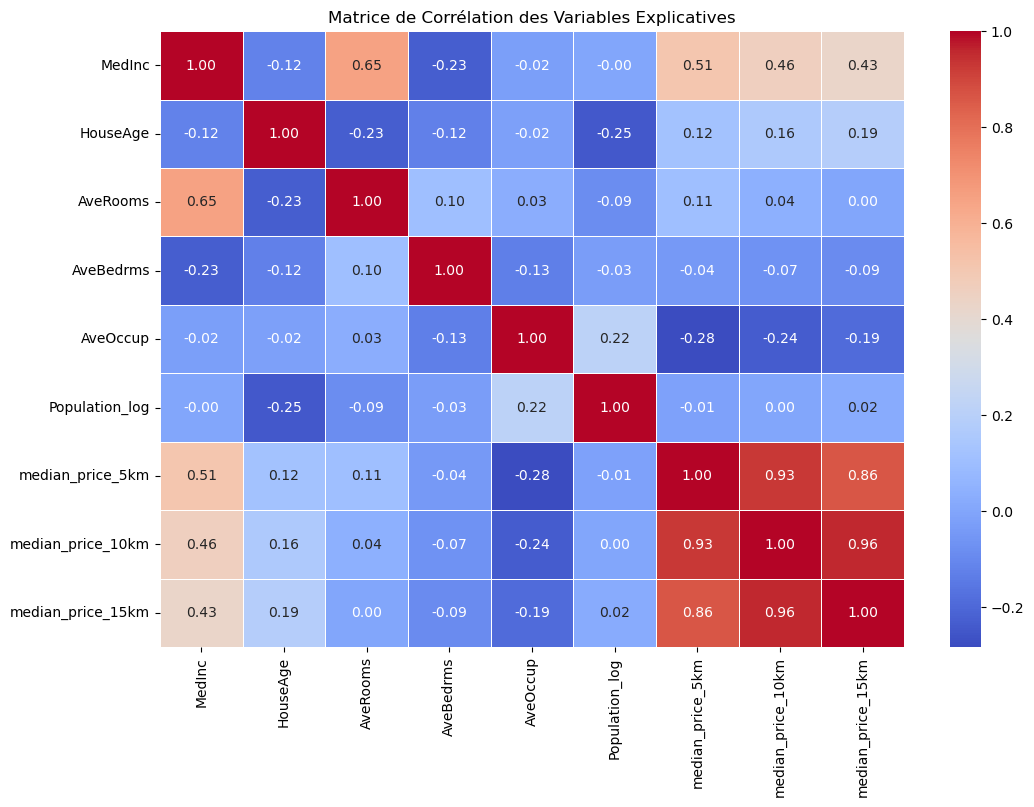

In [590]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)

corr_matrix = X_train.corr()

# Calcul des valeurs propres 
eigenvalues = np.linalg.eigh(corr_matrix, UPLO='U')[0]
print("Valeurs propres de la matrice de corrélation :")
print(eigenvalues)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrice de Corrélation des Variables Explicatives")
plt.show()


Nous observons une forte colinéarité entre certaines variables, notamment les **prix médians dans les rayons de 5 km, 10 km, et 15 km**, dont les valeurs propres de la matrice de corrélation sont proches de zéro. Cette multicolinéarité découle du fait que ces variables mesurent essentiellement la même information géographique à différentes échelles, rendant leurs valeurs très similaires. Cela peut poser un problème pour les modèles de régression classiques, car des variables fortement corrélées peuvent conduire à une estimation instable des coefficients. Pour gérer cette situation et éviter le surapprentissage, il est essentiel d'utiliser la **régression Ridge**, qui applique une régularisation et pénalise les coefficients élevés, permettant ainsi de stabiliser le modèle tout en conservant les informations pertinentes de ces variables corrélées.

### 7.3 Application de la Régression Ridge pour la Gestion de la Multicolinéarité
Afin de gérer la multicolinéarité et améliorer la stabilité de notre modèle de prédiction des prix immobiliers, nous appliquons la régression Ridge, qui régularise les coefficients pour éviter le surapprentissage tout en conservant les relations importantes entre les variables.

In [593]:
from sklearn.linear_model import RidgeCV

lambda_grille = np.logspace(15, -3, 100)
ridge_cv = RidgeCV(alphas=lambda_grille, store_cv_values=True)
ridge_cv.fit(X_scaled, y_train) 

cv_errors = np.mean(ridge_cv.cv_values_, axis=0)
cv_se = np.std(ridge_cv.cv_values_, axis=0) / np.sqrt(X_scaled.shape[0])

min_error_idx = np.argmin(cv_errors)
min_error = cv_errors[min_error_idx]
one_se_threshold = min_error + cv_se[min_error_idx]
lambda_min = lambda_grille[min_error_idx]
lambda_1se_idx = np.where(cv_errors <= one_se_threshold)[0][0]
lambda_1se = lambda_grille[lambda_1se_idx]

print(f"Lambda minimum : {lambda_min}")
print(f"Lambda 1se : {lambda_1se}")

Lambda minimum : 6.5793322465756825
Lambda 1se : 1519.9110829529332


Ce code ajuste un modèle Ridge avec validation croisée sur une grille de valeurs de λ.  

Il identifie deux valeurs optimales de λ :   

- $\widehat\lambda_\text{min}$ : la valeur de $\lambda$ qui rend l'erreur de prédiction estimée par validation croisée la plus faible,
- $\widehat\lambda_\text{1se}$ : la valeur de $\lambda$ la plus grande possible telle que l'erreur de prédiction moins l'erreur-type de cette estimation soit inférieure à l'erreur la plus faible.

Le modèle Ridge a sélectionné un $\widehat\lambda_\text{min}$ de 6.58, ce qui correspond à la valeur de régularisation offrant la meilleure performance sur les données d'entraînement. En appliquant la règle du **1se**, nous obtenons un $\widehat\lambda_\text{1se}$ de 1519.91, qui représente une régularisation plus forte et pourrait être utile pour éviter un surapprentissage excessif. Ces deux valeurs de lambda offrent un compromis entre minimisation de l'erreur et régularisation, nous permettant de choisir la régularisation qui convient le mieux en fonction de nos priorités.


Voici une représentation graphique de ces erreurs de validation croisée.

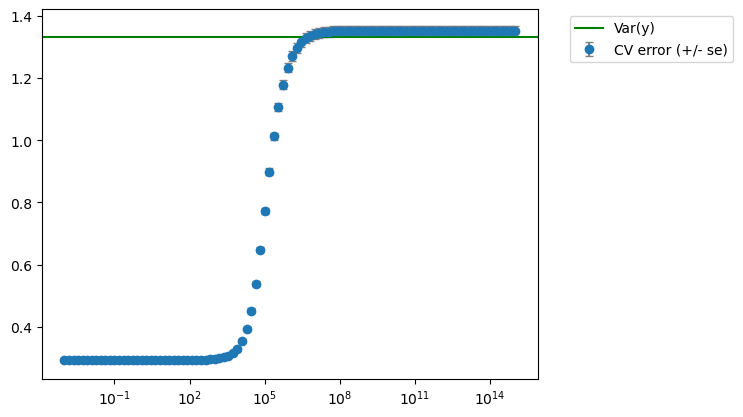

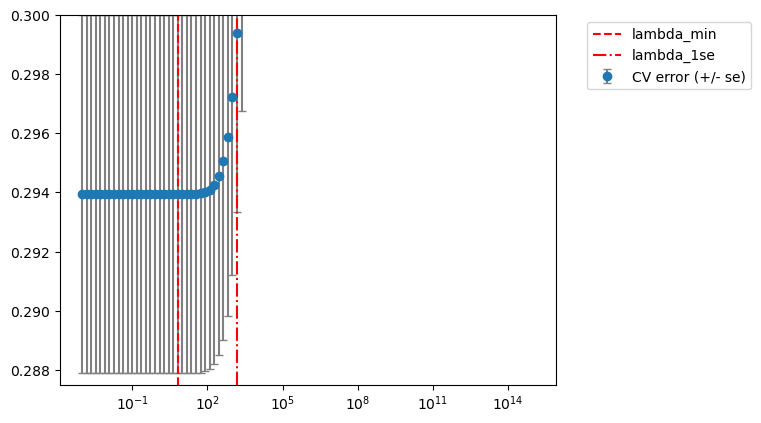

In [595]:
erreur = pd.DataFrame({'Lambda': lambda_grille, 'CV error': cv_errors, 'CV se': cv_se})
plt.errorbar(erreur['Lambda'], erreur['CV error'], yerr=erreur['CV se'], fmt='o', \
             ecolor='gray',  capsize=3, label='CV error (+/- se)')
plt.axhline(y=np.var(y), color='green', linestyle='-', label='Var(y)')
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Zoom sur la zone intéressante
plt.errorbar(erreur['Lambda'], erreur['CV error'], yerr=erreur['CV se'], fmt='o', \
             ecolor='gray', capsize=3, label='CV error (+/- se)')
plt.axvline(x=lambda_min, linestyle='--', color='red', label='lambda_min')
plt.axvline(x=lambda_1se, linestyle='-.', color='red', label='lambda_1se')
plt.ylim(0.2875, 0.3)
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Les graphiques montrent que le $\widehat\lambda_\text{min}$ de 6.58 minimise l'erreur de validation croisée, tandis que le $\widehat\lambda_\text{1se}$ de 1522.00, offrant une régularisation plus forte, reste dans une plage d'erreur acceptable, permettant de contrôler le surapprentissage.

On peut ensuite représenter les différentes estimations en fonction de $\lambda$.

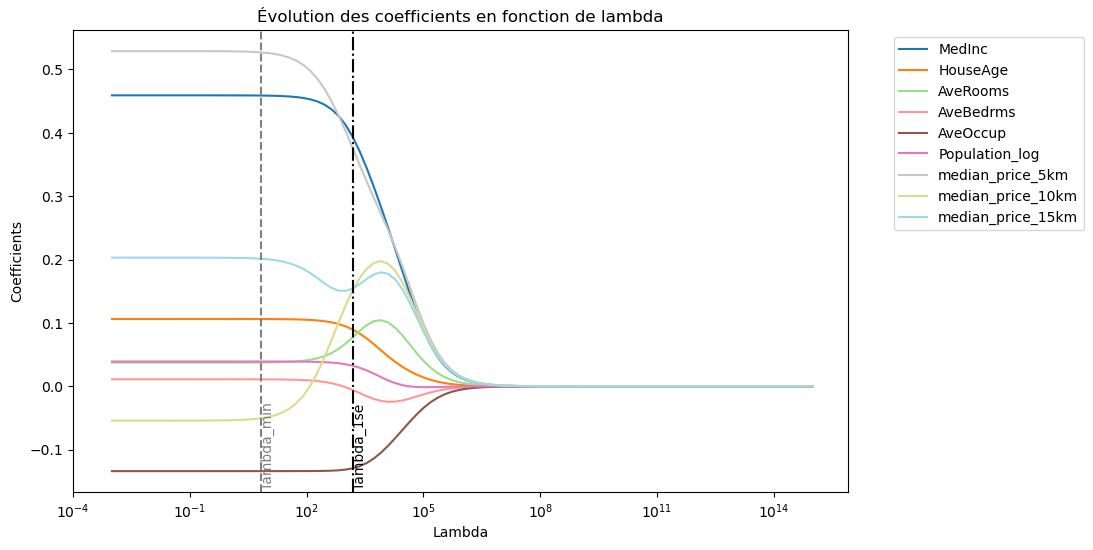

In [598]:
coefs = []
intercepts = []

for alpha in lambda_grille:
    ridge = RidgeCV(alphas=[alpha])
    ridge.fit(X_scaled, y_train)
    coefs.append(ridge.coef_)
    intercepts.append(ridge.intercept_)

coefs = np.array(coefs)
intercepts = np.array(intercepts)
var_names = X_train.columns.tolist()

plt.figure(figsize=(10, 6))
colors = plt.cm.tab20(np.linspace(0, 1, coefs.shape[1]))
for i in range(coefs.shape[1]):
    plt.plot(lambda_grille, coefs[:, i], label=var_names[i], color=colors[i])

plt.axvline(x=lambda_min, linestyle='--', color='grey')
plt.text(lambda_min, plt.ylim()[0], ' lambda_min', rotation=90, verticalalignment='bottom', color='grey')

plt.axvline(x=lambda_1se, linestyle='-.', color='black')
plt.text(lambda_1se, plt.ylim()[0], ' lambda_1se', rotation=90, verticalalignment='bottom', color='black')

plt.xscale('log')  
plt.xlim(lambda_grille.min() * 0.1, lambda_grille.max() * 8) 

plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.title('Évolution des coefficients en fonction de lambda')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Le graphique montre l'évolution des coefficients en fonction de $\lambda$ sur une échelle logarithmique. On observe que les coefficients des variables deviennent de plus en plus petits à mesure que $\lambda$  augmente, avec une régularisation plus forte réduisant progressivement leur impact. Les lignes verticales indiquent les valeurs de $\widehat\lambda_\text{min}$ et $\widehat\lambda_\text{1se}$, qui permettent de choisir un compromis entre une erreur faible et une régularisation suffisante pour éviter le surapprentissage. Ces résultats confirment que la régularisation permet de stabiliser le modèle tout en conservant la pertinence des variables importantes.

Nous affichons les coefficients estimés pour chaque variable, y compris l'intercept, en fonction des valeurs de $\widehat\lambda_\text{min}$ et $\widehat\lambda_\text{1se}$, afin de comparer l'impact de différentes régularisations sur les variables explicatives du modèle.

In [601]:
res = pd.DataFrame({
    'Variable': ['Intercept'] + X_train.columns.tolist(),  
    'Estimates (lambda_min)': [intercepts[min_error_idx]] + list(coefs[min_error_idx, :]),  
    'Estimates (lambda_1se)': [intercepts[lambda_1se_idx]] + list(coefs[lambda_1se_idx, :])  
})

print(f"Coefficients pour lambda_min ({lambda_min}) et lambda_1se ({lambda_1se}):")
print(res)


Coefficients pour lambda_min (6.5793322465756825) et lambda_1se (1519.9110829529332):
            Variable  Estimates (lambda_min)  Estimates (lambda_1se)
0          Intercept                2.093499                2.093499
1             MedInc                0.458787                0.393564
2           HouseAge                0.106165                0.089661
3           AveRooms                0.037602                0.077280
4          AveBedrms                0.011020               -0.005798
5           AveOccup               -0.133782               -0.129373
6     Population_log                0.039134                0.032483
7   median_price_5km                0.526893                0.376019
8  median_price_10km               -0.050476                0.151318
9  median_price_15km                0.201293                0.154237


Nous ajustons alors le modèle de régression Ridge en utilisant le $\widehat\lambda_\text{1se}$, qui est plus conservateur que le $\widehat\lambda_\text{min}$, car il pénalise davantage les coefficients, ce qui le rend souvent plus robuste aux variations des données et plus stable.

In [603]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=lambda_1se) 
ridge_model.fit(X_scaled, y_train)

y_train_pred = ridge_model.predict(X_scaled)
y_test_pred = ridge_model.predict(X_test_scaled)

Nous évaluons les performances du modèle Ridge en calculant l'erreur quadratique moyenne (RMSE (Root Mean Squared Error)) et le coefficient de détermination (R²) sur les données d'entraînement et de test, afin de mesurer la qualité de la prédiction.

In [605]:
from sklearn.metrics import mean_squared_error

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"RMSE sur les données d'entraînement : {train_rmse}")
print(f"RMSE sur les données de test : {test_rmse}")
print("R squared sur les données d'entraînement : ", ridge_model.score(X_scaled, y_train))
print("R squared sur les données de test : ", ridge_model.score(X_test_scaled, y_test))

RMSE sur les données d'entraînement : 0.5467863353467166
RMSE sur les données de test : 0.5649000660192208
R squared sur les données d'entraînement :  0.7787188479369275
R squared sur les données de test :  0.7588085121016085


Le RMSE  mesure l'écart moyen entre les valeurs prédites et les valeurs réelles. Un RMSE faible indique que le modèle fait de bonnes prédictions. Dans ce cas, le RMSE sur les données d'entraînement est de 0.55 et sur les données de test est de 0.56, ce qui montre une performance stable.

Le R² mesure la proportion de la variance expliquée par le modèle. Un R² élevé, comme 0.78 pour les données d'entraînement et 0.76 pour les données de test, indique que le modèle explique bien la variation des données.

L'écart faible entre les RMSE d'entraînement et de test, ainsi que les R² similaires, suggère que le modèle généralise bien et n'est pas victime de surapprentissage, ce qui est très positif pour la robustesse du modèle.

Ainsi, Le modèle Ridge montre de bonnes performances avec une faible erreur de prédiction et une bonne capacité de généralisation entre les données d'entraînement et de test.

## 8. Conclusion
Dans le cadre de ce projet, nous avons cherché à prédire les prix immobiliers en Californie en utilisant le California Housing Dataset. À travers l'application de la régression linéaire, notamment la regression Ridge, nous avons pu analyser les données et effectuer des prédictions sur les prix des logements. Après avoir nettoyé et préparé les données, nous avons exploré les relations entre les variables, identifié des problèmes de multicolinéarité, et appliqué une régularisation pour éviter le surapprentissage. Les résultats obtenus montrent un modèle relativement robuste, avec un R² élevé et un RMSE faible, suggérant une bonne généralisation aux données de test. Ce projet a permis de bien comprendre les étapes clés d'un modèle prédictif, de la préparation des données à l'évaluation du modèle, et a démontré la capacité du modèle à faire des prédictions fiables sur des données réelles. Des améliorations futures peuvent inclure une exploration plus poussée des hyperparamètres et des tests sur d'autres modèles.